In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
print("🎯 STACKOVERFLOW DEVELOPER SURVEY ANALYSIS")
print("="*50)

# Load your data
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

print(f"Total responses: {len(df):,}")
print(f"Total questions: {len(df.columns)}")

🎯 STACKOVERFLOW DEVELOPER SURVEY ANALYSIS
Total responses: 65,437
Total questions: 114


In [5]:
# STEP 1: Define Target Variable and Key Features
# ==================================================
TARGET_VARIABLE = 'ConvertedCompYearly'

# Key features for salary prediction
KEY_FEATURES = [
    'YearsCodePro',      # Years of professional coding experience
    'EdLevel',           # Education level
    'Country',           # Country/location
    'DevType',           # Developer type/role
    'OrgSize',           # Organization size
    'WorkWeekHrs',       # Work hours per week
    'Age',               # Age
    'WorkRemote',        # Remote work arrangement
    'LanguageHaveWorkedWith',  # Programming languages
    'DatabaseHaveWorkedWith',  # Databases used
    'WebframeHaveWorkedWith',  # Web frameworks
    'PlatformHaveWorkedWith',  # Platforms
    'Employment',        # Employment type
    'CompanyType',       # Type of company
    'YearsCode',         # Total years coding
    'JobSat',            # Job satisfaction
    'CareerSat',         # Career satisfaction
    'MentalHealth',      # Mental health
    'MainBranch',        # Professional or hobbyist
    'BuyNewTool',        # Purchase decision influence
    'LearnCode',         # How they learned to code
    'OpSysPersonal',     # Operating system personal use
    'OpSysWork',         # Operating system work use
    'Gender',            # Gender
    'Ethnicity',         # Ethnicity
    'Sexuality',         # Sexuality
    'Trans',             # Transgender
    'MentalHealthOther', # Mental health other
]

# Filter to only include features that exist in your dataset
available_features = [col for col in KEY_FEATURES if col in df.columns]
print(f"\nAvailable key features: {len(available_features)}")



Available key features: 16


In [6]:
# STEP 2: Initial Salary Data Cleaning
# =====================================
print(f"\n💰 SALARY DATA ANALYSIS")
print("="*30)

# Work with salary data
salary_data = df[df[TARGET_VARIABLE].notna()].copy()
print(f"Developers with salary data: {len(salary_data):,}")
print(f"Salary range: ${salary_data[TARGET_VARIABLE].min():,.0f} - ${salary_data[TARGET_VARIABLE].max():,.0f}")


💰 SALARY DATA ANALYSIS
Developers with salary data: 23,435
Salary range: $1 - $16,256,603


In [7]:
# Remove extreme outliers (likely data entry errors)
print(f"\n🔍 OUTLIER ANALYSIS:")

# Method 1: Remove obvious errors
# Remove salaries below $5,000 (likely students/interns/errors)
# Remove salaries above $500,000 (likely errors or extreme outliers)
salary_clean = salary_data[
    (salary_data[TARGET_VARIABLE] >= 5000) & 
    (salary_data[TARGET_VARIABLE] <= 500000)
].copy()

outliers_removed = len(salary_data) - len(salary_clean)
print(f"Removed {outliers_removed:,} extreme outliers")
print(f"Clean salary dataset: {len(salary_clean):,} developers")
print(f"New salary range: ${salary_clean[TARGET_VARIABLE].min():,.0f} - ${salary_clean[TARGET_VARIABLE].max():,.0f}")


🔍 OUTLIER ANALYSIS:
Removed 1,653 extreme outliers
Clean salary dataset: 21,782 developers
New salary range: $5,000 - $500,000


In [8]:
# Method 2: Statistical outlier detection for reference
Q1 = salary_clean[TARGET_VARIABLE].quantile(0.25)
Q3 = salary_clean[TARGET_VARIABLE].quantile(0.75)
IQR = Q3 - Q1
statistical_lower = Q1 - 1.5 * IQR
statistical_upper = Q3 + 1.5 * IQR

statistical_outliers = salary_clean[
    (salary_clean[TARGET_VARIABLE] < statistical_lower) | 
    (salary_clean[TARGET_VARIABLE] > statistical_upper)
]

print(f"\nStatistical outliers (IQR method): {len(statistical_outliers):,}")
print(f"Statistical range: ${statistical_lower:,.0f} - ${statistical_upper:,.0f}")


Statistical outliers (IQR method): 920
Statistical range: $-66,500 - $217,500


In [9]:
# STEP 3: Salary Distribution Analysis
# ====================================
print(f"\n📊 SALARY DISTRIBUTION:")
salary_stats = {
    'Mean': salary_clean[TARGET_VARIABLE].mean(),
    'Median': salary_clean[TARGET_VARIABLE].median(),
    'Mode': salary_clean[TARGET_VARIABLE].mode().iloc[0] if len(salary_clean[TARGET_VARIABLE].mode()) > 0 else 'N/A',
    'Std Dev': salary_clean[TARGET_VARIABLE].std(),
    'Skewness': salary_clean[TARGET_VARIABLE].skew(),
    'Kurtosis': salary_clean[TARGET_VARIABLE].kurtosis()
}

for stat, value in salary_stats.items():
    if isinstance(value, (int, float)):
        if stat in ['Mean', 'Median', 'Mode']:
            print(f"  • {stat}: ${value:,.0f}")
        else:
            print(f"  • {stat}: {value:.3f}")


📊 SALARY DISTRIBUTION:
  • Mean: $84,962
  • Median: $69,814
  • Mode: $64,444
  • Std Dev: 65805.199
  • Skewness: 1.848
  • Kurtosis: 5.466


In [10]:
# Distribution assessment
skew_value = salary_stats['Skewness']
if abs(skew_value) < 0.5:
    distribution_type = "Approximately normal"
elif abs(skew_value) < 1:
    distribution_type = "Moderately skewed"
else:
    distribution_type = "Highly skewed"

print(f"\nDistribution type: {distribution_type}")


Distribution type: Highly skewed


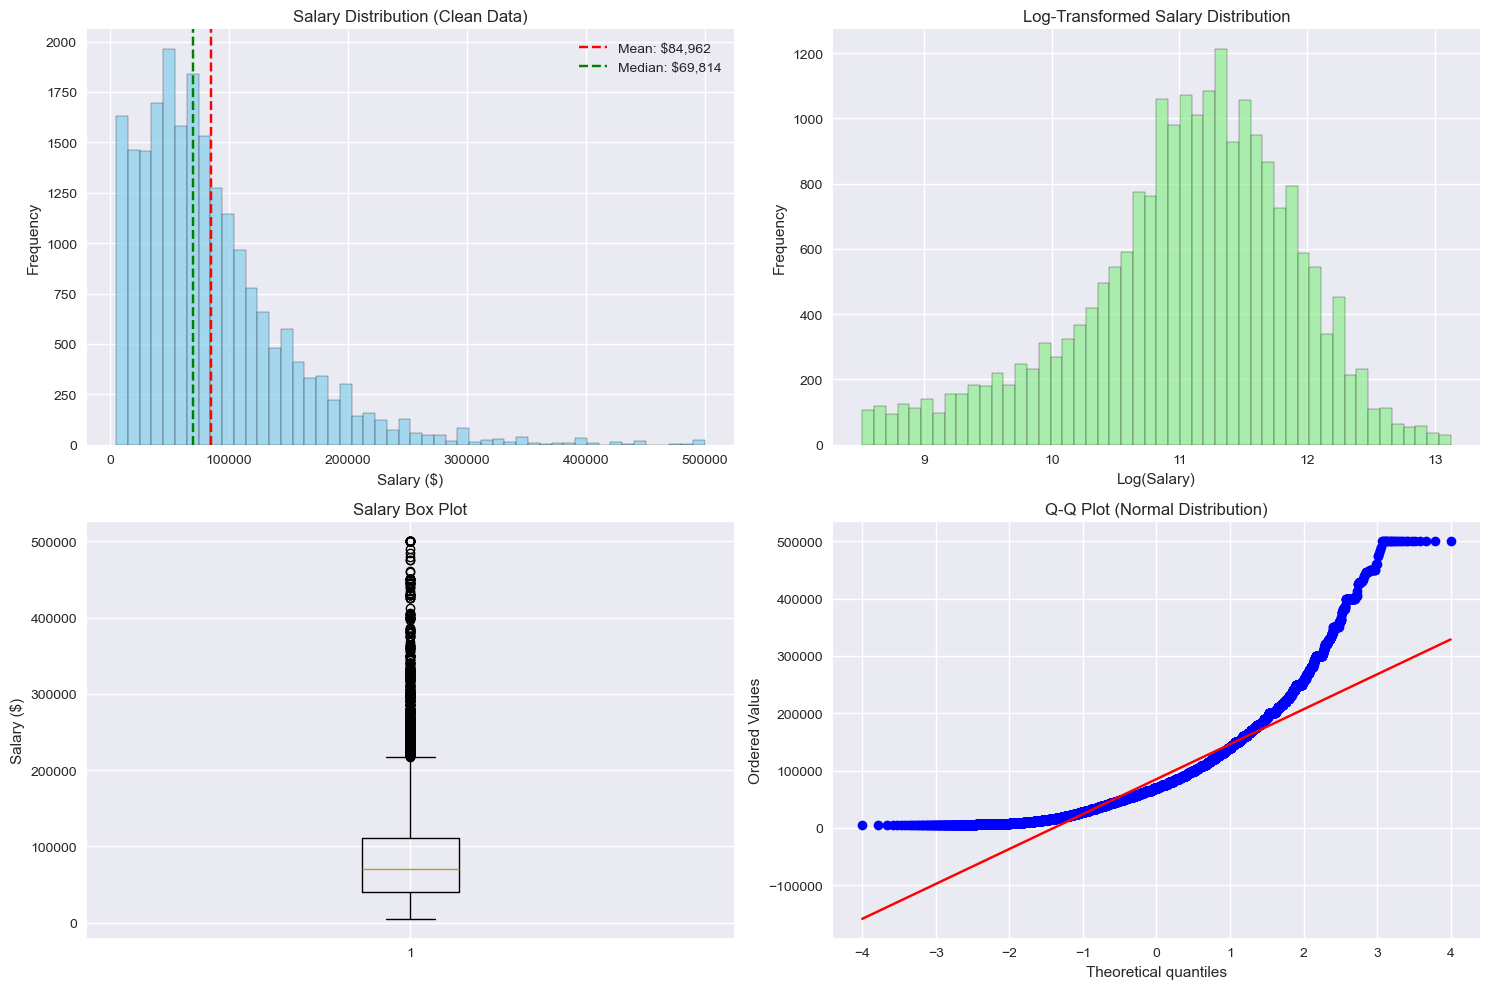

In [13]:
# Visualize salary distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram
axes[0,0].hist(salary_clean[TARGET_VARIABLE], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Salary Distribution (Clean Data)')
axes[0,0].set_xlabel('Salary ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(salary_stats['Mean'], color='red', linestyle='--', label=f'Mean: ${salary_stats["Mean"]:,.0f}')
axes[0,0].axvline(salary_stats['Median'], color='green', linestyle='--', label=f'Median: ${salary_stats["Median"]:,.0f}')
axes[0,0].legend()

# 2. Log-transformed histogram
log_salary = np.log(salary_clean[TARGET_VARIABLE])
axes[0,1].hist(log_salary, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Log-Transformed Salary Distribution')
axes[0,1].set_xlabel('Log(Salary)')
axes[0,1].set_ylabel('Frequency')

# 3. Box plot
axes[1,0].boxplot(salary_clean[TARGET_VARIABLE])
axes[1,0].set_title('Salary Box Plot')
axes[1,0].set_ylabel('Salary ($)')

# 4. Q-Q plot
stats.probplot(salary_clean[TARGET_VARIABLE], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normal Distribution)')

plt.tight_layout()
plt.show()


🌍 GEOGRAPHIC SALARY ANALYSIS:
Top 10 countries by average salary (min 50 responses):
                                                    count      mean    median
Country                                                                      
United States of America                             4590  153343.0  141550.0
Singapore                                              55  136150.0  103482.0
Switzerland                                           382  119767.0  111417.0
Israel                                                215  114766.0  113334.0
Australia                                             505   99905.0   95796.0
Ireland                                               119   98417.0   91295.0
Canada                                                861   97256.0   87231.0
United Kingdom of Great Britain and Northern Ir...   1375   97208.0   84076.0
Denmark                                               208   90959.0   89569.0
Norway                                                22

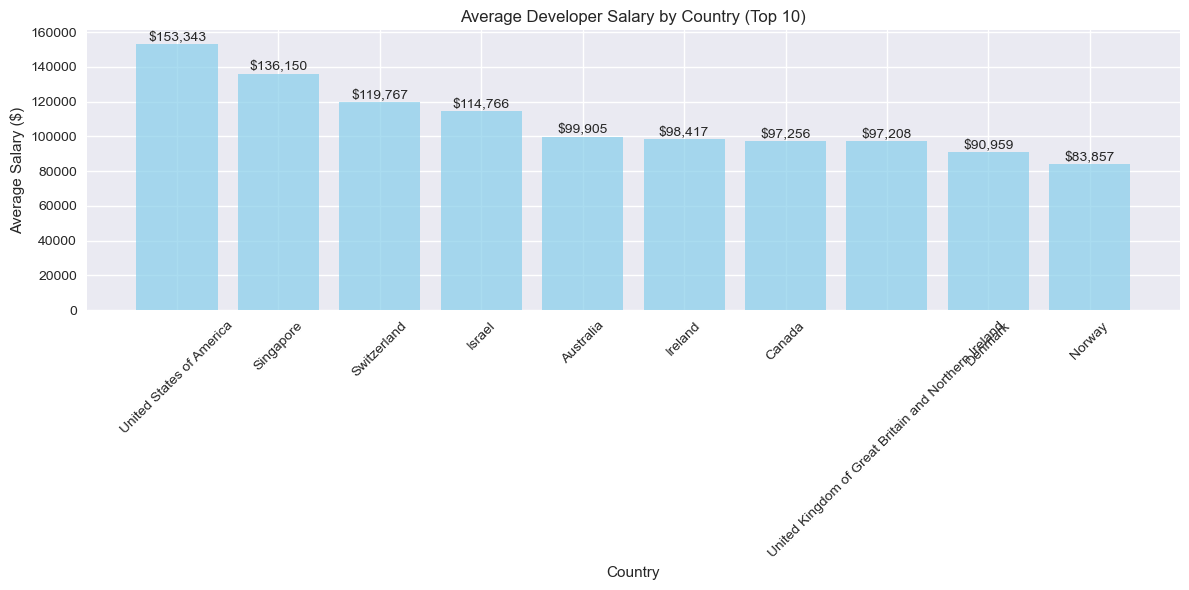

In [14]:
# STEP 4: Geographic Analysis
# ===========================
print(f"\n🌍 GEOGRAPHIC SALARY ANALYSIS:")

if 'Country' in salary_clean.columns:
    country_salary = salary_clean.groupby('Country')[TARGET_VARIABLE].agg(['count', 'mean', 'median']).round(0)
    country_salary = country_salary[country_salary['count'] >= 50].sort_values('mean', ascending=False)
    
    print(f"Top 10 countries by average salary (min 50 responses):")
    print(country_salary.head(10))
    
    # Visualize top countries
    top_countries = country_salary.head(10)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(top_countries)), top_countries['mean'], color='skyblue', alpha=0.7)
    plt.title('Average Developer Salary by Country (Top 10)')
    plt.xlabel('Country')
    plt.ylabel('Average Salary ($)')
    plt.xticks(range(len(top_countries)), top_countries.index, rotation=45)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()



💼 EXPERIENCE VS SALARY:
Correlation between experience and salary: 0.356

Salary by experience bracket:
                    count      mean    median
Experience_Bracket                           
0-2 years            2354   45340.0   36346.0
3-5 years            4781   59609.0   49681.0
6-10 years           5959   86976.0   73036.0
11-20 years          5276  107430.0   90000.0
20+ years            2804  123326.0  107406.0


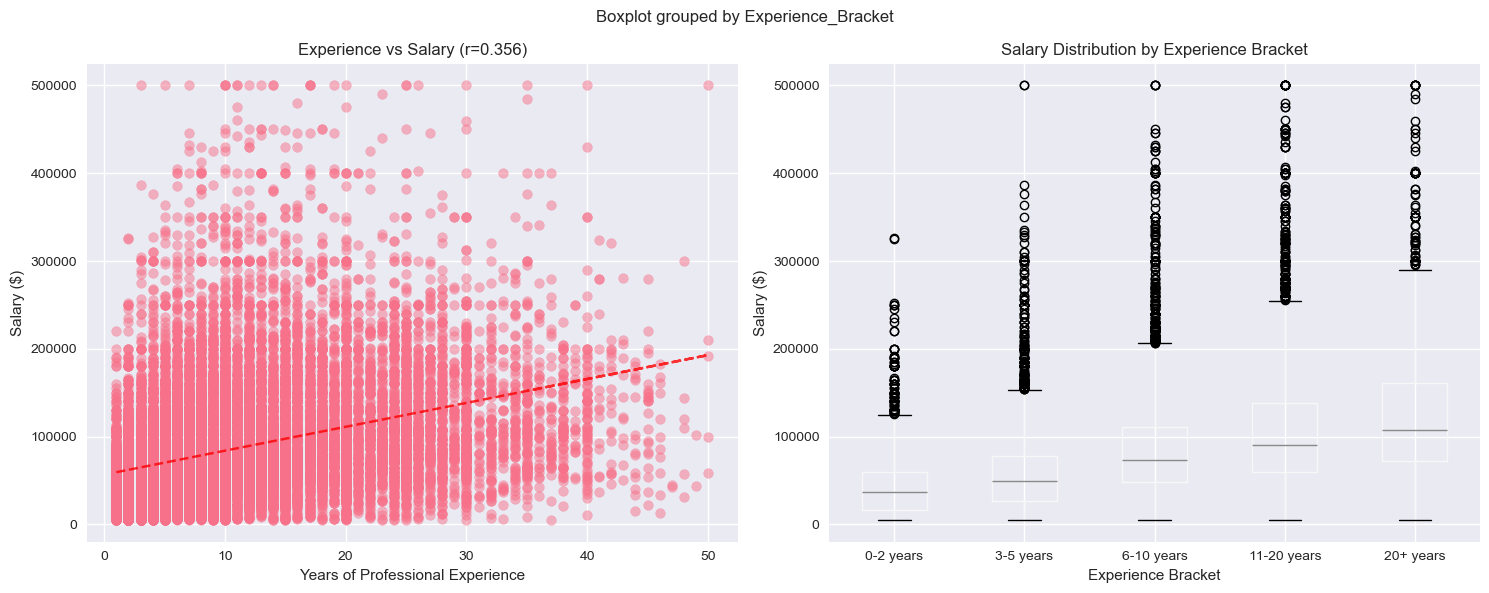

In [19]:
# STEP 5: Experience vs Salary Analysis
# =====================================
print(f"\n💼 EXPERIENCE VS SALARY:")

if 'YearsCodePro' in salary_clean.columns:
    # Clean experience data
    exp_salary = salary_clean[salary_clean['YearsCodePro'].notna()].copy()
    
    # Convert YearsCodePro to numeric
    exp_salary['YearsCodePro'] = pd.to_numeric(exp_salary['YearsCodePro'], errors='coerce')
    
    # Remove extreme experience values (>50 years is unrealistic for most)
    exp_salary = exp_salary[exp_salary['YearsCodePro'] <= 50]
    
    # Calculate correlation
    correlation = exp_salary['YearsCodePro'].corr(exp_salary[TARGET_VARIABLE])
    print(f"Correlation between experience and salary: {correlation:.3f}")
    
    # Experience brackets analysis
    exp_salary['Experience_Bracket'] = pd.cut(exp_salary['YearsCodePro'], 
                                            bins=[0, 2, 5, 10, 20, 50], 
                                            labels=['0-2 years', '3-5 years', '6-10 years', '11-20 years', '20+ years'])
    
    exp_brackets = exp_salary.groupby('Experience_Bracket')[TARGET_VARIABLE].agg(['count', 'mean', 'median']).round(0)
    print(f"\nSalary by experience bracket:")
    print(exp_brackets)
    
    # Visualize experience vs salary
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scatter plot
    axes[0].scatter(exp_salary['YearsCodePro'], exp_salary[TARGET_VARIABLE], alpha=0.5)
    axes[0].set_xlabel('Years of Professional Experience')
    axes[0].set_ylabel('Salary ($)')
    axes[0].set_title(f'Experience vs Salary (r={correlation:.3f})')
    
    # Add trend line
    z = np.polyfit(exp_salary['YearsCodePro'], exp_salary[TARGET_VARIABLE], 1)
    p = np.poly1d(z)
    axes[0].plot(exp_salary['YearsCodePro'], p(exp_salary['YearsCodePro']), "r--", alpha=0.8)
    
    # Box plot by experience bracket
    exp_salary.boxplot(column=TARGET_VARIABLE, by='Experience_Bracket', ax=axes[1])
    axes[1].set_title('Salary Distribution by Experience Bracket')
    axes[1].set_xlabel('Experience Bracket')
    axes[1].set_ylabel('Salary ($)')
    
    plt.tight_layout()
    plt.show()


🎓 EDUCATION VS SALARY:
Salary by education level (min 30 responses):
                                                    count     mean   median
EdLevel                                                                    
Professional degree (JD, MD, Ph.D, Ed.D, etc.)       1105  98097.0  80555.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)         9613  87573.0  72000.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)      6395  86647.0  71129.0
Some college/university study without earning a...   2584  79636.0  63694.0
Primary/elementary school                             117  77725.0  56086.0
Associate degree (A.A., A.S., etc.)                   699  77642.0  64444.0
Something else                                        193  67321.0  57601.0
Secondary school (e.g. American high school, Ge...   1076  59625.0  49082.0


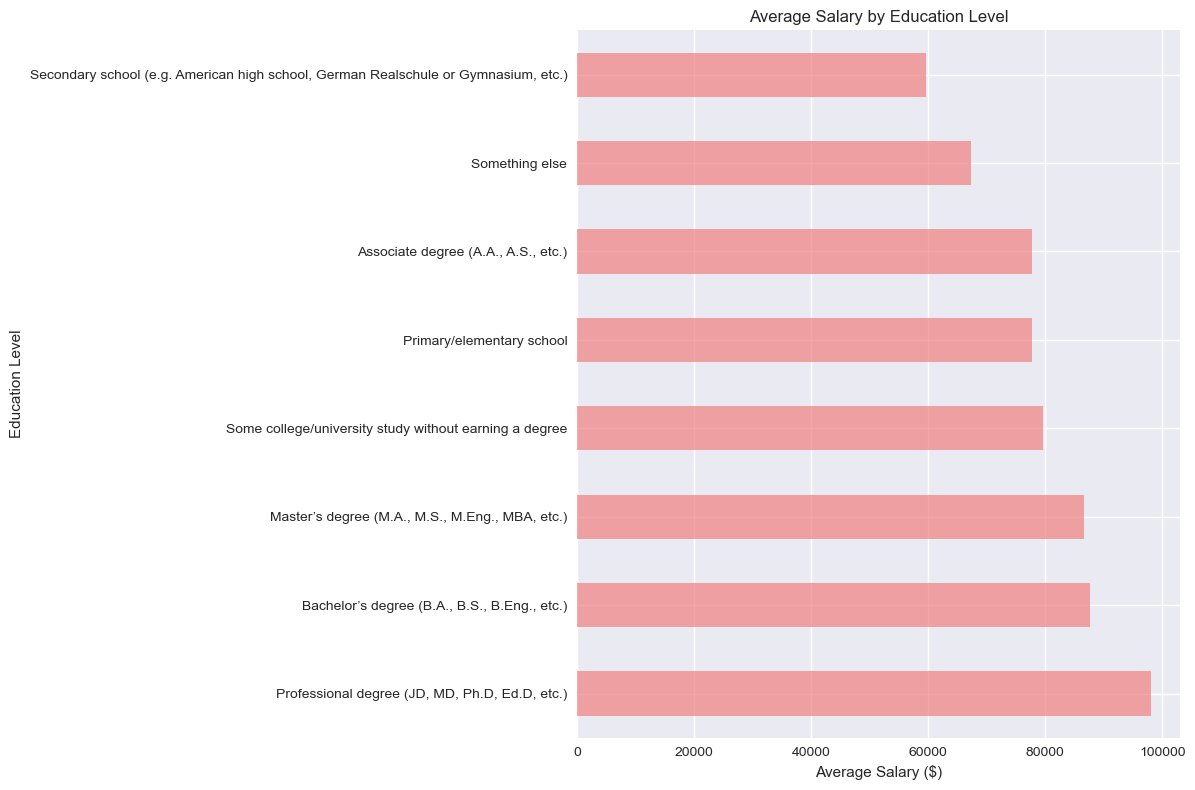

In [20]:
# STEP 6: Education Level Analysis
# ================================
print(f"\n🎓 EDUCATION VS SALARY:")

if 'EdLevel' in salary_clean.columns:
    ed_salary = salary_clean[salary_clean['EdLevel'].notna()].copy()
    
    education_salary = ed_salary.groupby('EdLevel')[TARGET_VARIABLE].agg(['count', 'mean', 'median']).round(0)
    education_salary = education_salary[education_salary['count'] >= 30].sort_values('mean', ascending=False)
    
    print(f"Salary by education level (min 30 responses):")
    print(education_salary)
    
    # Visualize education vs salary
    plt.figure(figsize=(12, 8))
    education_salary['mean'].plot(kind='barh', color='lightcoral', alpha=0.7)
    plt.title('Average Salary by Education Level')
    plt.xlabel('Average Salary ($)')
    plt.ylabel('Education Level')
    plt.tight_layout()
    plt.show()



👩‍💻 DEVELOPER TYPE VS SALARY:
Top developer types by salary (min 100 responses):
                                               count      mean    median
DevType                                                                 
Senior Executive (C-Suite, VP, etc.)             281  144453.0  120000.0
Engineering manager                              519  130809.0  116000.0
Cloud infrastructure engineer                    270  114077.0   99042.0
Engineer, site reliability                       124  112082.0   99550.0
Security professional                            106  105323.0   81678.0
Developer, AI                                    179  103718.0   80555.0
Other (please specify):                          622   99972.0   82802.0
Research & Development role                      386   94979.0   75800.0
Data engineer                                    549   92596.0   79279.0
Data scientist or machine learning specialist    415   92077.0   75000.0
Scientist                                 

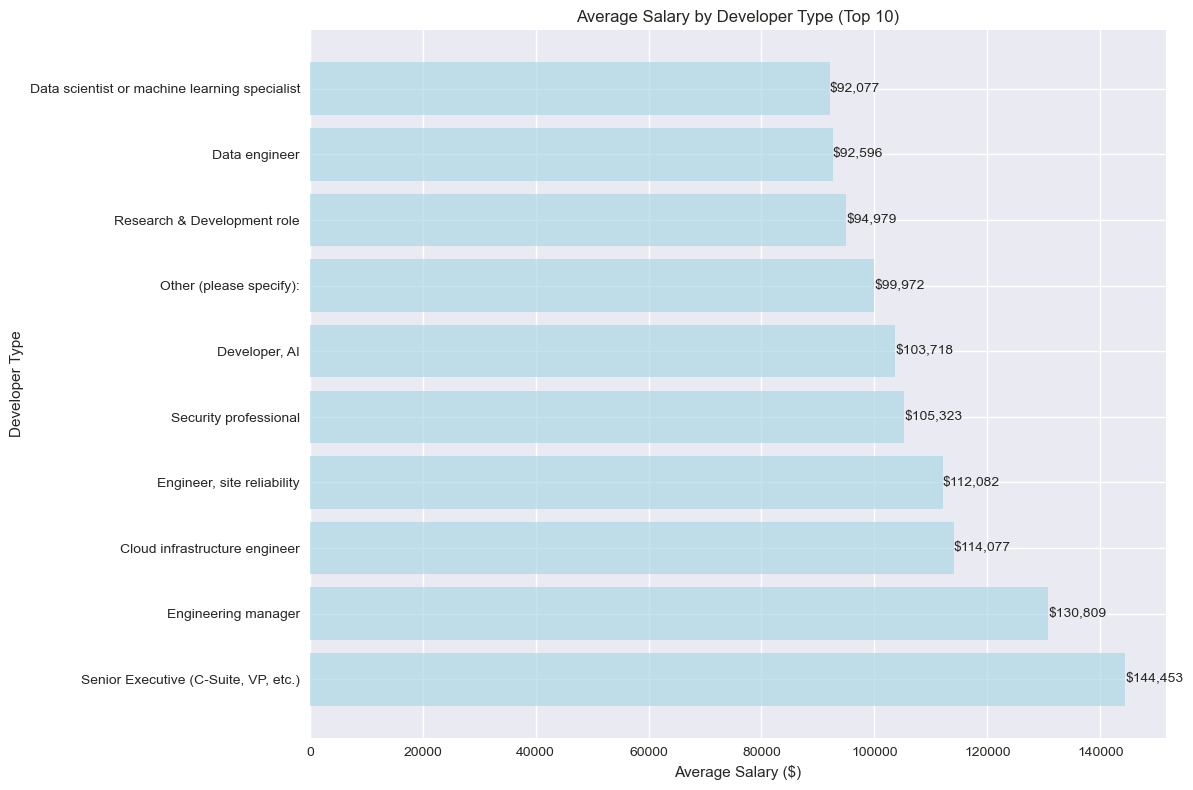

In [21]:
# STEP 7: Developer Type Analysis
# ===============================
print(f"\n👩‍💻 DEVELOPER TYPE VS SALARY:")

if 'DevType' in salary_clean.columns:
    # DevType often contains multiple values separated by semicolons
    dev_types_expanded = []
    
    for idx, row in salary_clean.iterrows():
        if pd.notna(row['DevType']):
            types = row['DevType'].split(';')
            for dev_type in types:
                dev_types_expanded.append({
                    'DevType': dev_type.strip(),
                    'Salary': row[TARGET_VARIABLE]
                })
    
    dev_type_df = pd.DataFrame(dev_types_expanded)
    dev_type_salary = dev_type_df.groupby('DevType')['Salary'].agg(['count', 'mean', 'median']).round(0)
    dev_type_salary = dev_type_salary[dev_type_salary['count'] >= 100].sort_values('mean', ascending=False)
    
    print(f"Top developer types by salary (min 100 responses):")
    print(dev_type_salary.head(15))
    
    # Visualize top dev types
    top_dev_types = dev_type_salary.head(10)
    
    plt.figure(figsize=(12, 8))
    bars = plt.barh(range(len(top_dev_types)), top_dev_types['mean'], color='lightblue', alpha=0.7)
    plt.title('Average Salary by Developer Type (Top 10)')
    plt.xlabel('Average Salary ($)')
    plt.ylabel('Developer Type')
    plt.yticks(range(len(top_dev_types)), top_dev_types.index)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2.,
                f'${width:,.0f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

In [22]:
# STEP 8: Summary for Project Questions
# ====================================
print(f"\n📋 PROJECT QUESTIONS PREPARATION:")
print("="*40)

print(f"✅ Dataset ready for analysis:")
print(f"  • Clean salary data: {len(salary_clean):,} developers")
print(f"  • Salary range: ${salary_clean[TARGET_VARIABLE].min():,.0f} - ${salary_clean[TARGET_VARIABLE].max():,.0f}")
print(f"  • Available features: {len(available_features)}")

print(f"\n🎯 Initial insights discovered:")
print(f"  • Average developer salary: ${salary_stats['Mean']:,.0f}")
print(f"  • Median developer salary: ${salary_stats['Median']:,.0f}")
print(f"  • Experience-salary correlation: {correlation:.3f}")

if 'Country' in salary_clean.columns:
    top_country = country_salary.index[0]
    top_salary = country_salary.iloc[0]['mean']
    print(f"  • Highest paying country: {top_country} (${top_salary:,.0f})")

if 'EdLevel' in salary_clean.columns:
    top_education = education_salary.index[0]
    top_ed_salary = education_salary.iloc[0]['mean']
    print(f"  • Highest paying education: {top_education} (${top_ed_salary:,.0f})")

print(f"\n🚀 Ready for detailed analysis and modeling!")
print(f"Next steps:")
print(f"  1. Feature engineering (encode categorical variables)")
print(f"  2. Feature selection (identify most important predictors)")
print(f"  3. Model training and evaluation")
print(f"  4. Creative scenario analysis")

# Save the cleaned dataset
salary_clean.to_csv('stackoverflow_salary_clean.csv', index=False)
print(f"\n💾 Clean dataset saved as 'stackoverflow_salary_clean.csv'")


📋 PROJECT QUESTIONS PREPARATION:
✅ Dataset ready for analysis:
  • Clean salary data: 21,782 developers
  • Salary range: $5,000 - $500,000
  • Available features: 16

🎯 Initial insights discovered:
  • Average developer salary: $84,962
  • Median developer salary: $69,814
  • Experience-salary correlation: 0.356
  • Highest paying country: United States of America ($153,343)
  • Highest paying education: Professional degree (JD, MD, Ph.D, Ed.D, etc.) ($98,097)

🚀 Ready for detailed analysis and modeling!
Next steps:
  1. Feature engineering (encode categorical variables)
  2. Feature selection (identify most important predictors)
  3. Model training and evaluation
  4. Creative scenario analysis

💾 Clean dataset saved as 'stackoverflow_salary_clean.csv'
